Kruti Bagwe Roll no.05 TE INFT-A Batch-1 Experiment - 5

# **Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_california_housing
california_dataset = fetch_california_housing()
# Check the keys in the dataset
california_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
california_df = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_df['Target'] = california_dataset.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Check for missing values in all columns of the california_df DataFrame
california_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


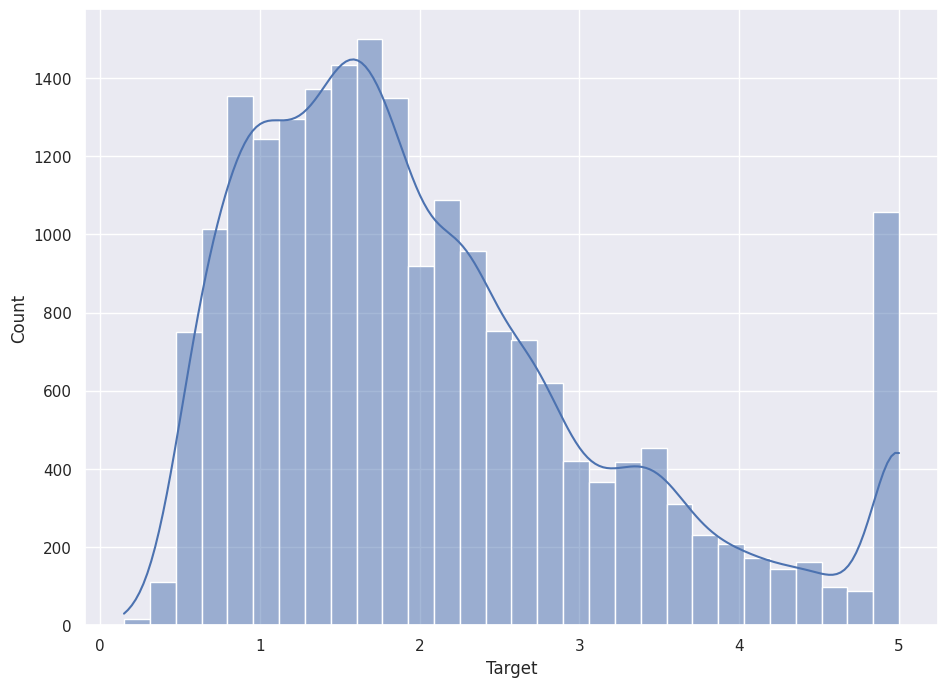

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
# Plot a histogram showing the distribution of the target values
sns.histplot(california_df['Target'], bins=30, kde=True)
plt.show()

In [ ]:
# Compute the pairwise correlation for all columns in the california_df DataFrame
correlation_matrix = california_df.corr().round(2)
# Display the correlation matrix
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
Target,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


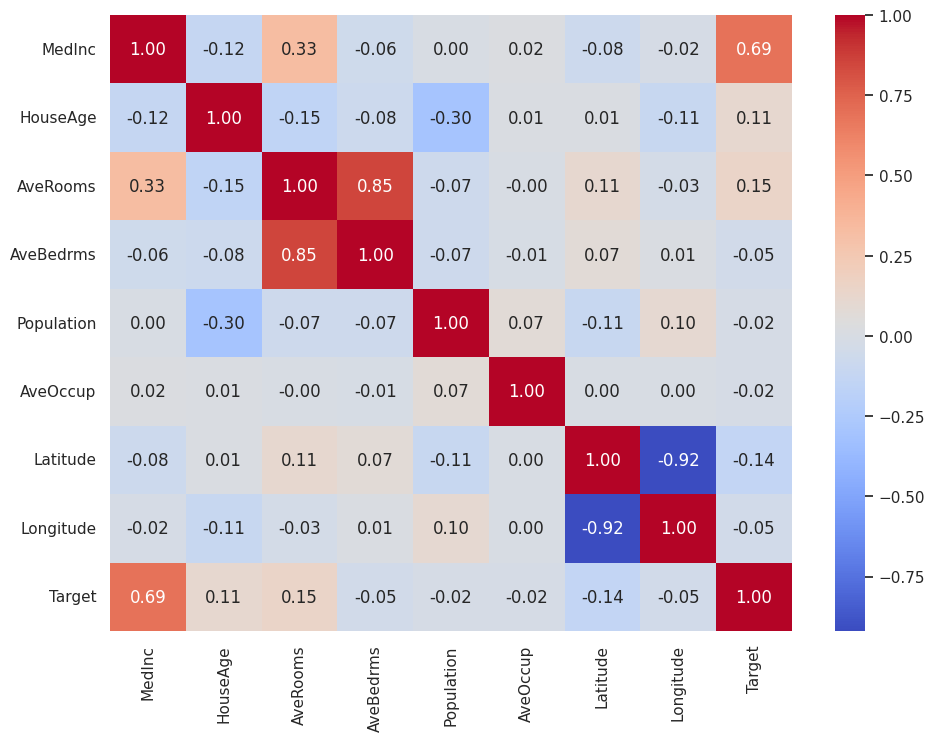

In [ ]:
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

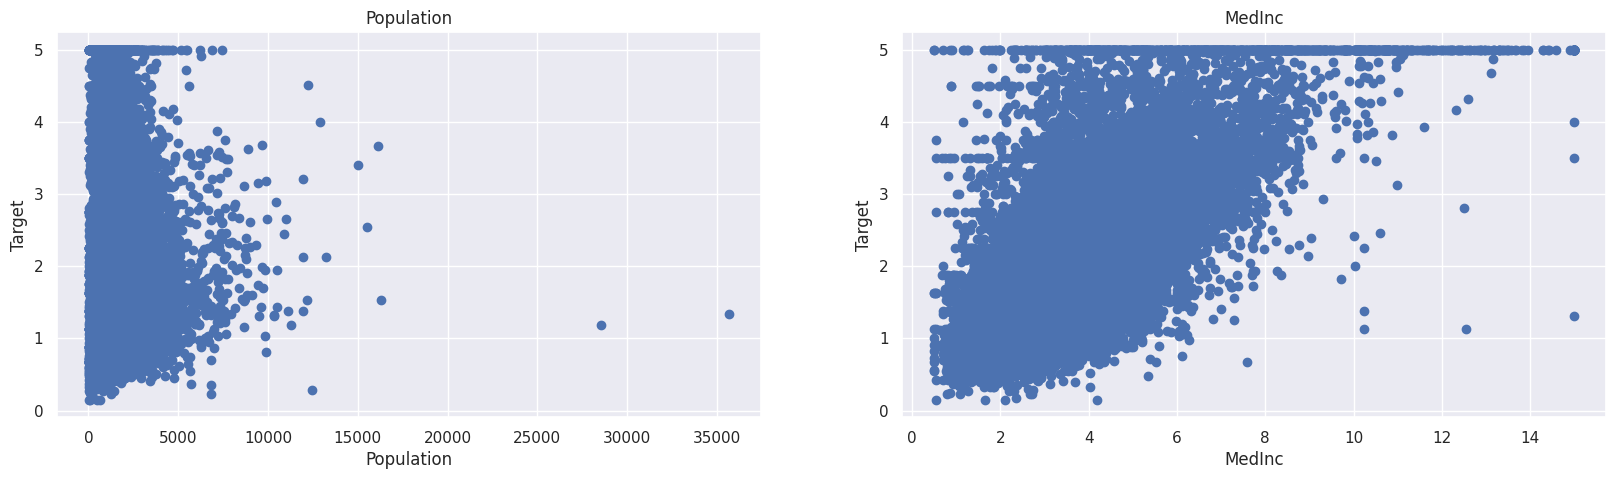

In [ ]:
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(20, 5))
# Features based on correlation
features = ['Population', 'MedInc']
target = california_df['Target']
# Loop over the features and plot scatter plots
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = california_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Target')
plt.show()

In [ ]:
# Prepare data for training
X = pd.DataFrame(np.c_[california_df['Population'], california_df['MedInc']], columns=['Population', 'MedInc'])
Y = california_df['Target']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
# Print the shapes of the training and test datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (16512, 2)
X_test shape: (4128, 2)
Y_train shape: (16512,)
Y_test shape: (4128,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the linear regression model
lin_model = LinearRegression()

# Train the model on the training data
lin_model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model evaluation for the training set
y_train_predict = lin_model.predict(X_train)

# Calculate RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predict))

# Calculate R2 score for the training set
r2_train = r2_score(Y_train, y_train_predict)

print("The model performance for the training set")
print("--------------------------------------")
print(f'RMSE is {rmse_train}')
print(f'R2 score is {r2_train}')
print("\n")

# Model evaluation for the testing set
y_test_predict = lin_model.predict(X_test)

# Calculate RMSE for the testing set
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))

# Calculate R2 score for the testing set
r2_test = r2_score(Y_test, y_test_predict)

print("The model performance for the testing set")
print("--------------------------------------")
print(f'RMSE is {rmse_test}')
print(f'R2 score is {r2_test}')


The model performance for the training set
--------------------------------------
RMSE is 0.8353895884756939
R2 score is 0.4710691022937322


The model performance for the testing set
--------------------------------------
RMSE is 0.8420444497581225
R2 score is 0.48608606526178855


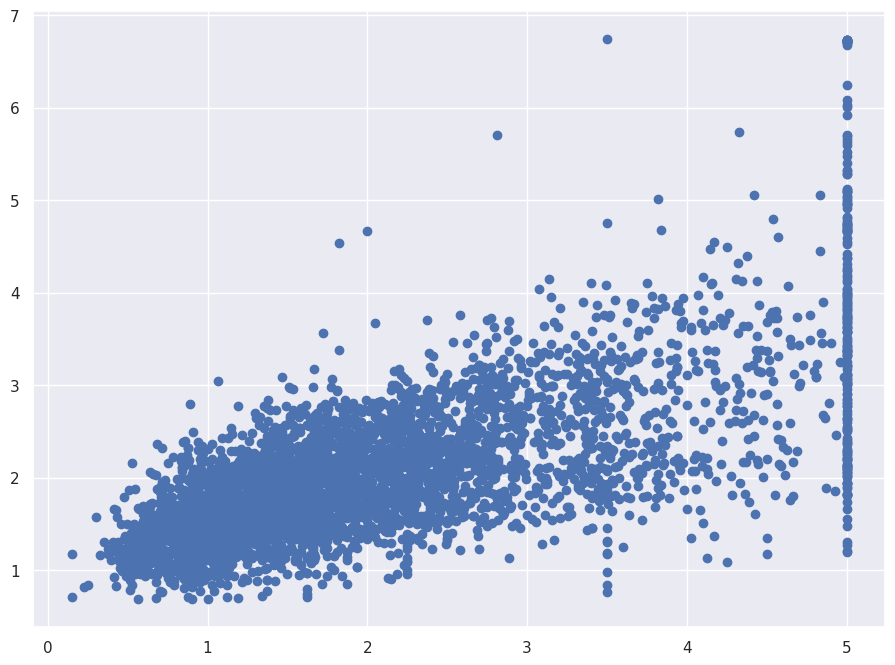

In [ ]:
 #plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

## **Logistic Regression**

In [ ]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
digits = load_digits()
x = digits.data
y = digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
log_reg = LogisticRegression()

In [ ]:
b = log_reg.fit(X_train,y_train)
c = log_reg.predict(X_test )
print(c)

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 4 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 1 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 3 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 2 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 8 9 1 8 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 4 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 3 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 2 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 1 2 5 3 3 3 2 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 1 0 2 6 9 3 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
acc = sklearn.metrics.accuracy_score(y_test, c)
print(acc)

0.9685185185185186
